Adınız: Zeynep

Soyadınız: Söylemez

Okul Numarası: 2212721031

GitHub Repo Bağlantısı: https://github.com/zeynep-35/CNN_siniflandirma

In [ ]:
# Veri seti yolu
DATA_DIR = '/content/drive/MyDrive/makine_ogrenmesi_odev_1'

# Parametreler
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32
EPOCHS = 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 # SOTA mimari seçimi [cite: 79]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import os

In [ ]:
# Veri seti yolları
DATA_DIR = '/content/drive/MyDrive/makine_ogrenmesi_odev_1'
TRAIN_DIR = os.path.join(DATA_DIR, 'train') # Eğitim klasörü
TEST_DIR = os.path.join(DATA_DIR, 'test')   # Test klasörü

# Parametreler [cite: 67]
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32
EPOCHS = 15

In [ ]:
# %20'sini ayırmak için validation_split ekliyoruz
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Eğitim verisi (%80)
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training', # Eğitim kısmını al
    shuffle=True
)

# Test/Doğrulama verisi (%20)
test_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation', # Ayırılan %20'lik kısmı al
    shuffle=False
)

Found 128 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
# ImageNet ağırlıklı hazır model [cite: 80]
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Katmanları dondur (Performansı düşük tutmak için strateji)
for layer in base_model.layers:
    layer.trainable = False

# Yeni model oluşturma
model1 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
print("--- Model 1 Eğitimi Başlıyor ---")
history1 = model1.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

--- Model 1 Eğitimi Başlıyor ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5594 - loss: 2.0644 - val_accuracy: 0.9375 - val_loss: 0.3045
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.7063 - loss: 0.4432 - val_accuracy: 0.9375 - val_loss: 0.2293
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9937 - loss: 0.1475 - val_accuracy: 0.9375 - val_loss: 0.1916
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9458 - loss: 0.0969 - val_accuracy: 0.9375 - val_loss: 0.2000
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9708 - loss: 0.0915 - val_accuracy: 0.9688 - val_loss: 0.0906
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.9969 - loss: 0.0131 - val_accuracy: 0.9688 - val_loss: 0.0487
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.9688 - val_loss: 0.0373
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 0.9688 - val_loss: 0.0362
Epoch 9/

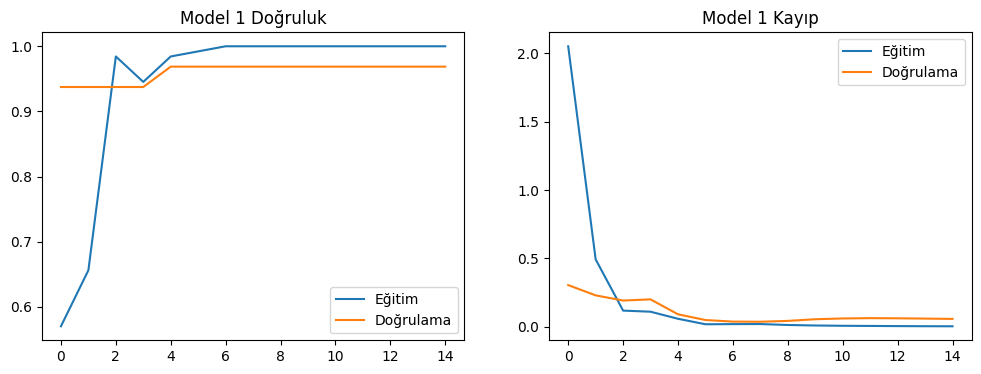

In [ ]:
plt.figure(figsize=(12, 4))
# Doğruluk
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Eğitim')
plt.plot(history1.history['val_accuracy'], label='Doğrulama')
plt.title('Model 1 Doğruluk')
plt.legend()
# Kayıp
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Eğitim')
plt.plot(history1.history['val_loss'], label='Doğrulama')
plt.title('Model 1 Kayıp')
plt.legend()
plt.show()

In [ ]:
# Modeli değerlendir
test_loss, test_acc = model1.evaluate(test_generator)

print(f"--- Model 1 Sonuçları ---")
print(f"Model 1 Test Kaybı: {test_loss:.4f}")
print(f"Model 1 Test Doğruluğu: %{test_acc*100:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9688 - loss: 0.0570
--- Model 1 Sonuçları ---
Model 1 Test Kaybı: 0.0570
Model 1 Test Doğruluğu: %96.88
